### 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [1]:
import struct;print(struct.calcsize("P") * 8)

64


In [2]:
import tensorflow as tf 
import os

In [3]:
# Avoid OOM error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\bradd\AppData\Local\Temp\ipykernel_14228\2011824555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


1.2 Remove Dodgy Images

In [6]:
# Reading the data
data_dir = 'data'

In [7]:
# List of all images in happy folder
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '108584594-portrait-of-happy-friends-having-fun-and-making-group-photo-and-smiling.jpg',
 '154006829.jpg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '613k1XcpYCL.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '8cEbMbgxi.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc--baby-essentials-baby-baby.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'download (1).jpg',
 'download (10).jpg',
 'download (11).jpg',
 'download (12).jpg',
 'download (13).jpg',
 'download (14).jpg',
 'download (15).jpg',
 'download (16).jpg',
 'download (17).jpg',
 'download (18)

In [8]:
# Image extensions 
image_exts = ['jpeg', 'jpg','bmp', 'png']

In [9]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [10]:
img.shape

(3744, 5616, 3)

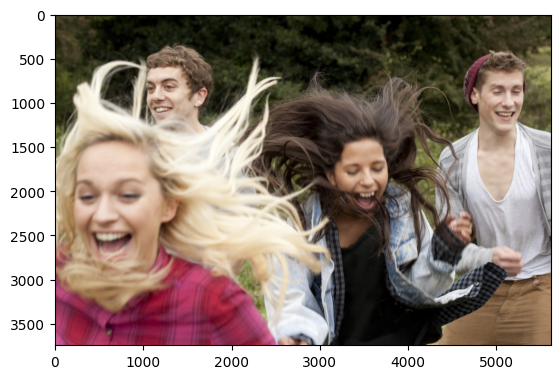

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
image not in ext list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
image not in ext list data\sad\39681222.jpg
image not in ext list data\sad\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
image not in ext list data\sad\depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
image not in ext list data\sad\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
image not in ext list data\sad\depositphotos_9980774-stock-photo-sad-lonely-pensive-old-senior.jpg


#### 1.3 Load Data

In [13]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1115 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [40]:
batch = data_iterator.next()

In [36]:
len(batch)

2

In [28]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# Resize the images
#tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128))

In [41]:
# Class 1 = Sad pple
# Class 0 = Happy pple
batch[1]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

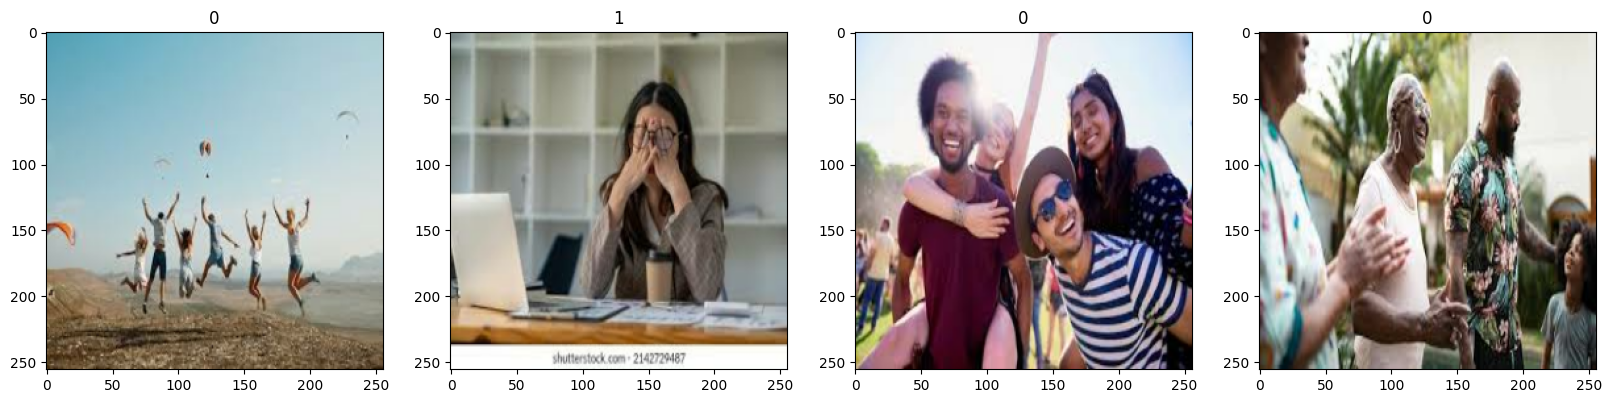

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [43]:
print(batch[0].min())
print(batch[0].max())


0.0
255.0


In [45]:
scaled = batch[0]/255

In [46]:
print(scaled.min())
print(scaled.max())

0.0
1.0


### 2.0 Preprocess Data

#### 2.1 Scale Data

In [49]:
data = data.map(lambda X, y: (X/255, y))

In [52]:
scaled_iterator = data.as_numpy_iterator()

In [53]:
batch = scaled_iterator.next()

In [56]:
batch[1].max()

1

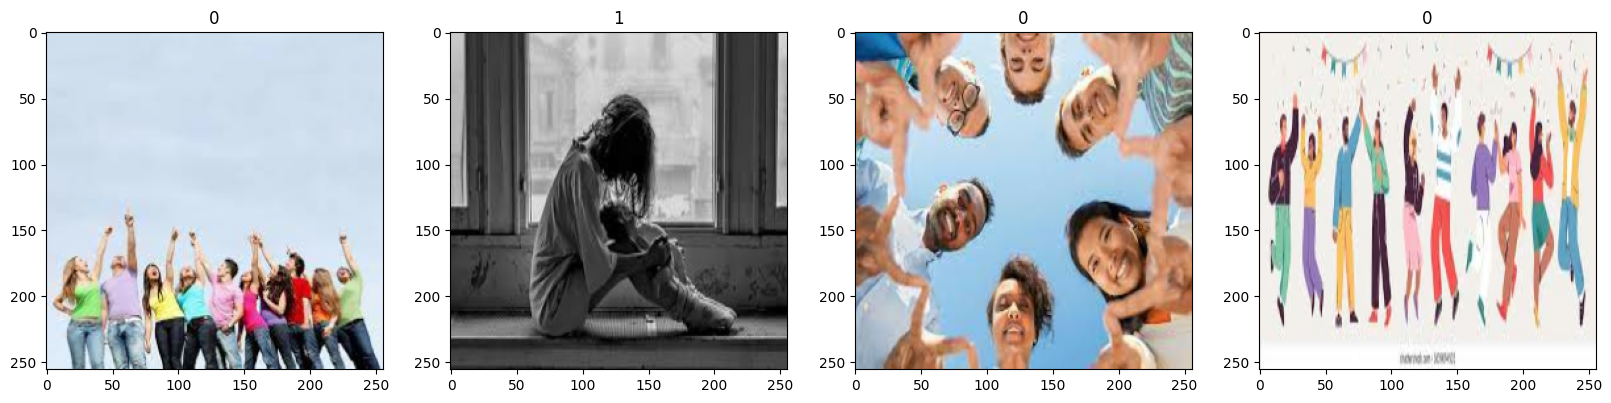

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [58]:
len(data)

35

In [64]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [70]:
print('train_size: {}\n val_size: {}\n test_size: {}'.format(train_size, val_size, test_size))

train_size: 24
 val_size: 8
 test_size: 3


In [71]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [74]:
print('train_size: {}\n val_size: {}\n test_size: {}'.format(len(train), len(val), len(test)))

train_size: 24
 val_size: 8
 test_size: 3


### 3.0 Deep Model

#### 3.1 Build Deep Learning Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [80]:
model = Sequential()

In [81]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))